## **Imports**

In [1]:
# !pip install ipython --upgrade
# !pip install jedi

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## **Load Data**

In [107]:
df_train = pd.read_csv("digit-recognizer/train.csv")
df_test = pd.read_csv("digit-recognizer/test.csv")

In [4]:
df_train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
X_train = df_train.drop(columns="label")
y_train = df_train["label"]

## **Plot the data**

In [6]:
X_train.iloc[0].values.shape

(784,)

In [7]:
np.sqrt(784)

np.float64(28.0)

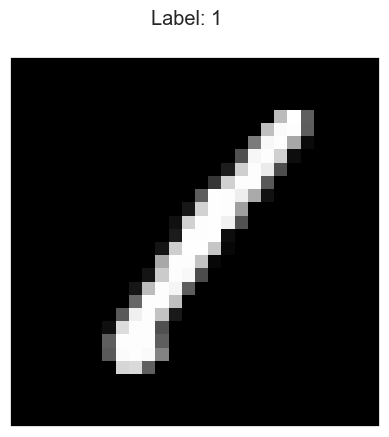

In [8]:
## image dimension is 28x28
plt.imshow(X_train.iloc[0].values.reshape(28,28), cmap="gray")
plt.suptitle(f"Label: {y_train.iloc[0]}")
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

*Turn this plotting functionality into a function that can plot any image*

In [9]:
def plot_image(pixel_row, label):
    plt.imshow(pixel_row.reshape(28,28), cmap="gray")
    plt.suptitle(f"Label: {label}")
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()

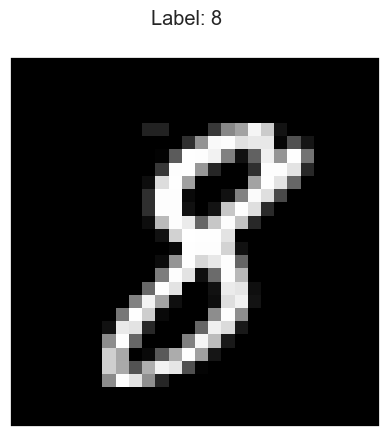

In [10]:
plot_image(X_train.iloc[20].values, y_train.iloc[20])

In [11]:
def plot_ten_images_for_each_class(X_train, y_train):
    fig, axs = plt.subplots(10, 10, figsize=(10, 10))
    for val in range(10):
        images = X_train[y_train == val].iloc[:10].values
        for idx, image in enumerate(images):
            axs[val, idx].imshow(image.reshape(28, 28), cmap="gray")
            axs[val, idx].grid(False)
            axs[val, idx].set_xticks([])
            axs[val, idx].set_yticks([])
    plt.show()

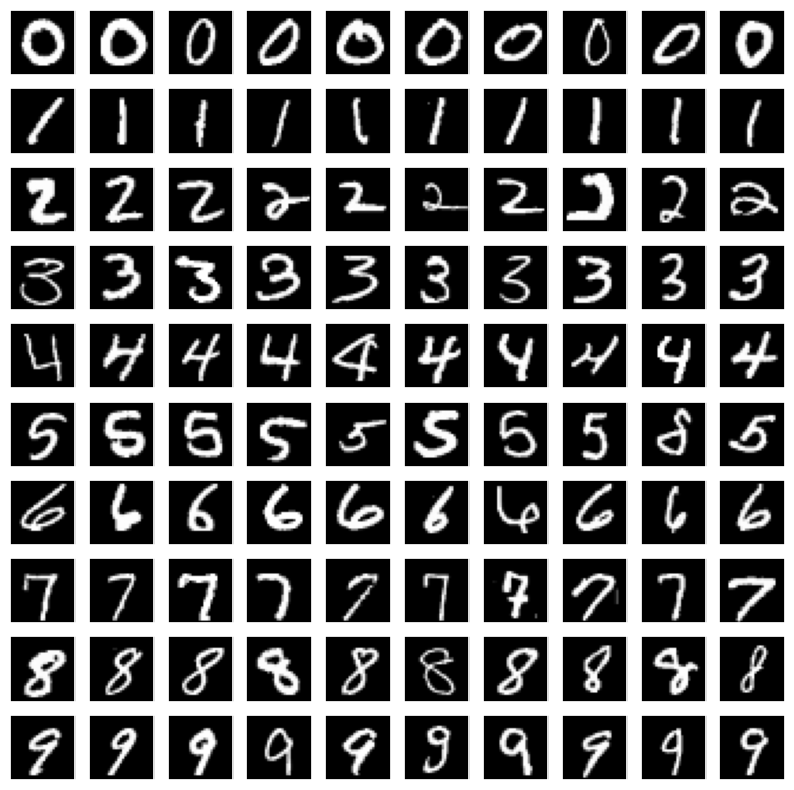

In [12]:
plot_ten_images_for_each_class(X_train, y_train)

## **Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)

In [14]:
model = LogisticRegression()
model.fit(Xt, yt)

/Users/leewenjin/anaconda3/envs/mnist-practice-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_train.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

## **What is our baseline model accuracy to beat?**

If we just randomly guessed one number, like 1, what would be our accuracy?

```
4684 / len(y_train) = 11.15%
```
Our baseline model accuracy to beat is 11%.

## **Logistic Regression Model Accuracy**

In [16]:
print(f"Model Accuracy: {model.score(Xv, yv)*100:.2f}%")

Model Accuracy: 91.18%


## **Getting intuition around Neural Networks**
- https://playground.tensorflow.org/

In [3]:
## import tensorflow as tf

In [23]:
# Specify the neural network model architecture,
# taking care to ensure that our input and output layers match our data.
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(10) # output layer: output a probability distribution of how likely it is in each class
])

In [24]:
# Now, we specify how we want Tensorflow to train our model.
# Specifically, what are our loss, optimizer, and evaluation metrics?
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [25]:
# This is where we actually fit the model and figure out
# what the best model weights are to give us accurate predictions.
history = model.fit(
    x=X_train.values,
    y=y_train.values,
    epochs=25,
    validation_split=0.25,
)

Epoch 1/25
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 4.6696 - sparse_categorical_accuracy: 0.8557 - val_loss: 0.9651 - val_sparse_categorical_accuracy: 0.8632
Epoch 2/25
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6557 - sparse_categorical_accuracy: 0.8894 - val_loss: 0.6430 - val_sparse_categorical_accuracy: 0.8919
Epoch 3/25
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3981 - sparse_categorical_accuracy: 0.9145 - val_loss: 0.4588 - val_sparse_categorical_accuracy: 0.9057
Epoch 4/25
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3064 - sparse_categorical_accuracy: 0.9234 - val_loss: 0.4634 - val_sparse_categorical_accuracy: 0.9107
Epoch 5/25
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2821 - sparse_categorical_accuracy: 0.9298 - val_loss: 0.3620 - val_sparse_categorical_accuracy: 0.9321
Epoch 6/25
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2702 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.3948 - val_sparse_categorical_accuracy: 0.9269
Epoc

In [57]:
def plot_training_and_validation_curves(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].plot(history.history["sparse_categorical_accuracy"], label="training accuracy")
    axs[0].plot(history.history["val_sparse_categorical_accuracy"], label="validation accuracy")
    axs[0].legend()
    axs[0].set_ylim(0.8, 1)
    
    axs[1].plot(history.history["loss"], label="training loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].legend()
    axs[1].set_ylim(0, 1)
    
    plt.suptitle("Training vs Validation Accuracy and Loss")
    plt.show()

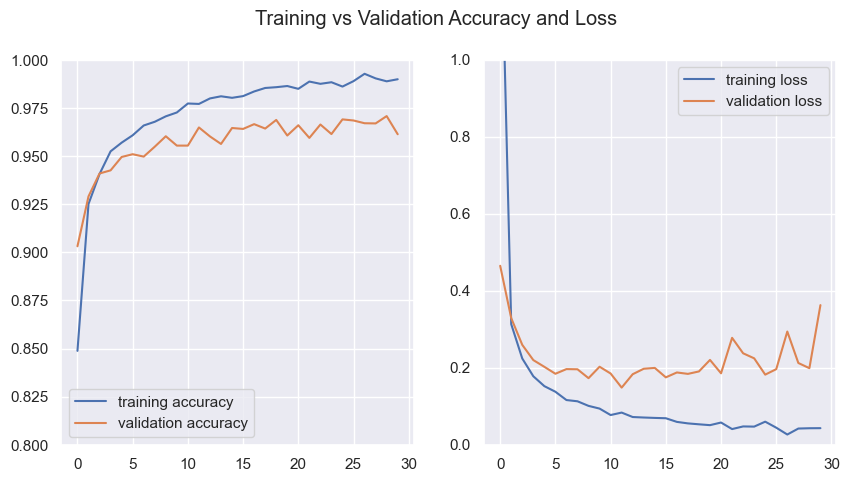

In [58]:
plot_training_and_validation_curves(history)

## **Experiment with Different Architectures**

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(10) # output layer: output a probability distribution of how likely it is in each class
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    x=X_train.values,
    y=y_train.values,
    epochs=30,
    validation_split=0.25,
)

Epoch 1/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.6484 - sparse_categorical_accuracy: 0.8534 - val_loss: 0.8299 - val_sparse_categorical_accuracy: 0.9069
Epoch 2/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6029 - sparse_categorical_accuracy: 0.9178 - val_loss: 0.6177 - val_sparse_categorical_accuracy: 0.9127
Epoch 3/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3932 - sparse_categorical_accuracy: 0.9341 - val_loss: 0.5195 - val_sparse_categorical_accuracy: 0.9228
Epoch 4/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3032 - sparse_categorical_accuracy: 0.9440 - val_loss: 0.3519 - val_sparse_categorical_accuracy: 0.9405
Epoch 5/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2440 - sparse_categorical_accuracy: 0.9477 - val_loss: 0.3059 - val_sparse_categorical_accuracy: 0.9436
Epoch 6/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1931 - sparse_categorical_accuracy: 0.9549 - val_loss: 0.2855 - val_sparse_categorical_accuracy: 0.9436
Epoc

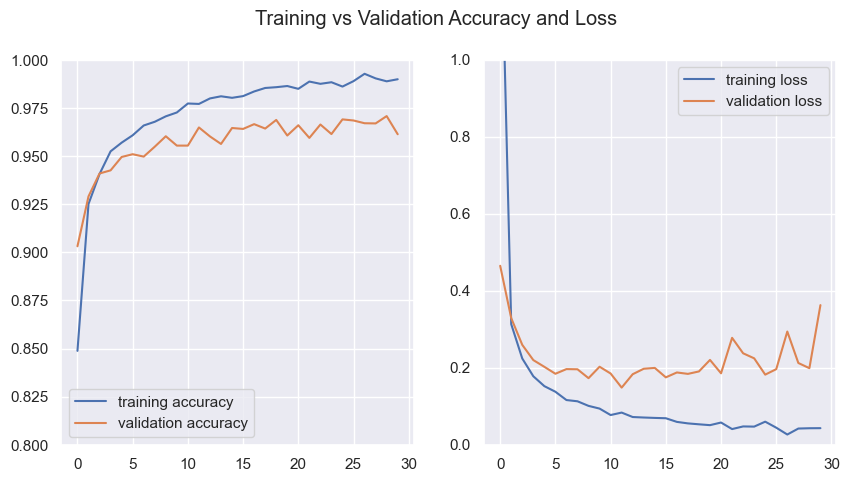

In [59]:
plot_training_and_validation_curves(history)

In [61]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(10) # output layer: output a probability distribution of how likely it is in each class
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    x=X_train.values,
    y=y_train.values,
    epochs=30,
    validation_split=0.25,
)

Epoch 1/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5701 - sparse_categorical_accuracy: 0.8418 - val_loss: 0.4524 - val_sparse_categorical_accuracy: 0.8991
Epoch 2/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3096 - sparse_categorical_accuracy: 0.9230 - val_loss: 0.3051 - val_sparse_categorical_accuracy: 0.9264
Epoch 3/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2066 - sparse_categorical_accuracy: 0.9441 - val_loss: 0.2592 - val_sparse_categorical_accuracy: 0.9325
Epoch 4/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1776 - sparse_categorical_accuracy: 0.9513 - val_loss: 0.2549 - val_sparse_categorical_accuracy: 0.9429
Epoch 5/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1564 - sparse_categorical_accuracy: 0.9550 - val_loss: 0.2049 - val_sparse_categorical_accuracy: 0.9464
Epoch 6/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1434 - sparse_categorical_accuracy: 0.9585 - val_loss: 0.1844 - val_sparse_categorical_accuracy: 0.9529
Epoc

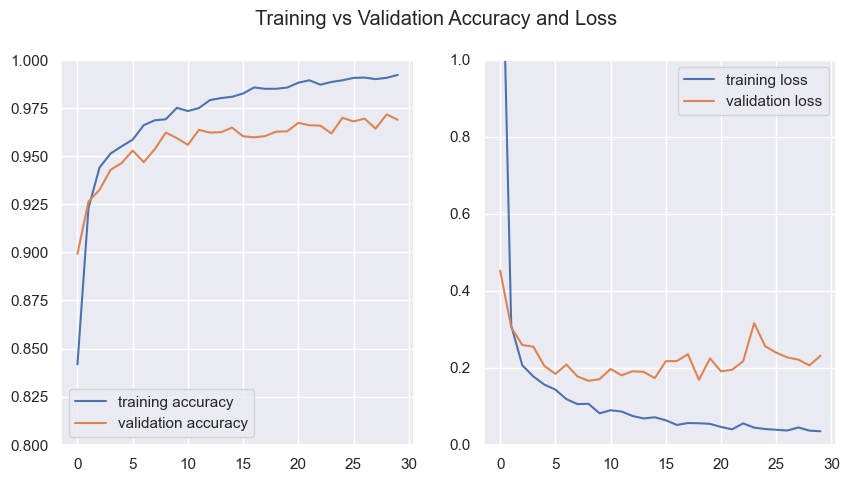

In [62]:
plot_training_and_validation_curves(history)

## **Early Stopping**

In [71]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(128, activation='relu'), # 128 neurons in this layer
    tf.keras.layers.Dense(10) # output layer: output a probability distribution of how likely it is in each class
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

history = model.fit(
    x=X_train.values,
    y=y_train.values,
    epochs=30,
    validation_split=0.25,
    callbacks=[es]
)

Epoch 1/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.4441 - sparse_categorical_accuracy: 0.8511 - val_loss: 0.4663 - val_sparse_categorical_accuracy: 0.9059
Epoch 2/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3149 - sparse_categorical_accuracy: 0.9249 - val_loss: 0.2871 - val_sparse_categorical_accuracy: 0.9297
Epoch 3/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2165 - sparse_categorical_accuracy: 0.9417 - val_loss: 0.2484 - val_sparse_categorical_accuracy: 0.9409
Epoch 4/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1723 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.2580 - val_sparse_categorical_accuracy: 0.9367
Epoch 5/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1637 - sparse_categorical_accuracy: 0.9536 - val_loss: 0.2006 - val_sparse_categorical_accuracy: 0.9507
Epoch 6/30
985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1337 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.1890 - val_sparse_categorical_accuracy: 0.9503
Epoc

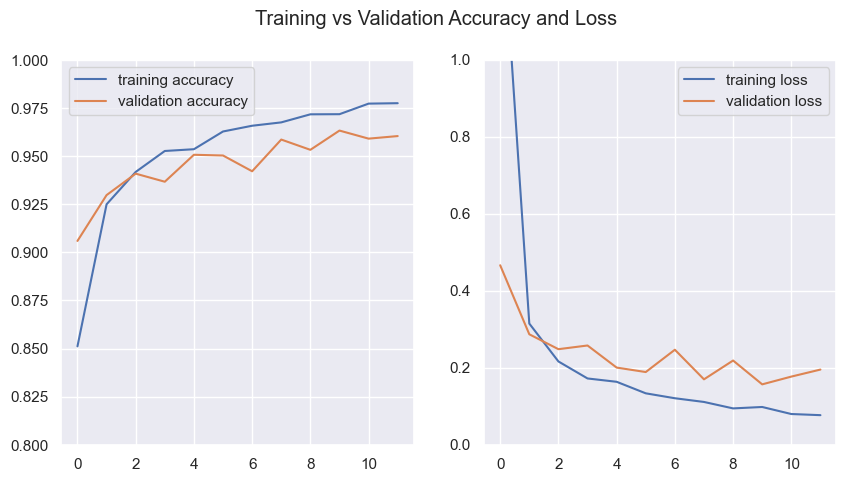

In [72]:
plot_training_and_validation_curves(history)

## **Model Evaluation, Confusion Matrix, etc.**

In [95]:
from sklearn.metrics import confusion_matrix

In [74]:
y_pred = model.predict(X_train.values)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


In [75]:
X_train.values.shape

(42000, 784)

In [87]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [99]:
# rows are the actual values, columns are the predicted values
# values in cell are the number of predictions that have that characteristic
conf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred_classes)

In [103]:
column_names = [f"predicted: {i}" for i in range(10)]
row_names = [f"actual: {i}" for i in range(10)]
readable_conf_mat = pd.DataFrame(conf_mat, index=row_names, columns=column_names)
readable_conf_mat

,predicted: 0,predicted: 1,predicted: 2,predicted: 3,predicted: 4,predicted: 5,predicted: 6,predicted: 7,predicted: 8,predicted: 9
actual: 0,4072,0,3,0,1,8,3,3,20,22
actual: 1,0,4660,4,2,1,2,3,2,9,1
actual: 2,16,8,4046,27,0,3,1,47,23,6
actual: 3,0,0,25,4221,0,54,0,10,13,28
actual: 4,7,8,9,1,3918,0,5,6,10,108
actual: 5,5,1,5,49,0,3708,5,0,12,10
actual: 6,34,2,10,0,4,49,4029,0,9,0
actual: 7,0,7,9,3,0,2,0,4353,2,25
actual: 8,2,12,4,36,2,81,4,1,3877,44
actual: 9,4,1,3,11,7,23,0,34,9,4096


<Axes: >

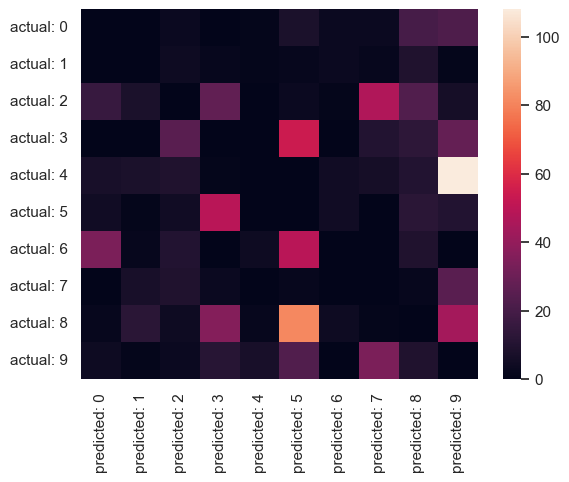

In [105]:
for i in range(10):
    readable_conf_mat.iloc[i, i] = 0
sns.heatmap(readable_conf_mat)

## **Exploring CNN**

In [170]:
# Build Model

from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # Specify the input shape
model.add(layers.Reshape((28, 28, 1), input_shape=(784,)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_16 (Reshape)            │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,162 (973.29 KB)

 Trainable params: 249,162 (973.29 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Early Stopping
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2)

history = model.fit(
    x=X_train.values,
    y=y_train.values,
    epochs=20,
    validation_split=0.25,
    callbacks=[es]
)

Epoch 1/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9095 - loss: 0.3464 - val_accuracy: 0.9720 - val_loss: 0.0929
Epoch 2/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9684 - loss: 0.1052 - val_accuracy: 0.9749 - val_loss: 0.0893
Epoch 3/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9745 - loss: 0.0837 - val_accuracy: 0.9797 - val_loss: 0.0684
Epoch 4/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9779 - loss: 0.0734 - val_accuracy: 0.9839 - val_loss: 0.0529
Epoch 5/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9810 - loss: 0.0664 - val_accuracy: 0.9856 - val_loss: 0.0465
Epoch 6/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9819 - loss: 0.0594 - val_accuracy: 0.9867 - val_loss: 0.0471
Epoch 7/20
985/985 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9819 - loss: 0.0604 - val_accuracy: 0.9855 - val_loss: 0.0539


In [130]:
def plot_training_and_validation_curves_cnn(history):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].plot(history.history["accuracy"], label="training accuracy")
    axs[0].plot(history.history["val_accuracy"], label="validation accuracy")
    axs[0].legend()
    axs[0].set_ylim(0.8, 1)
    
    axs[1].plot(history.history["loss"], label="training loss")
    axs[1].plot(history.history["val_loss"], label="validation loss")
    axs[1].legend()
    axs[1].set_ylim(0, 1)
    
    plt.suptitle("Training vs Validation Accuracy and Loss")
    plt.show()

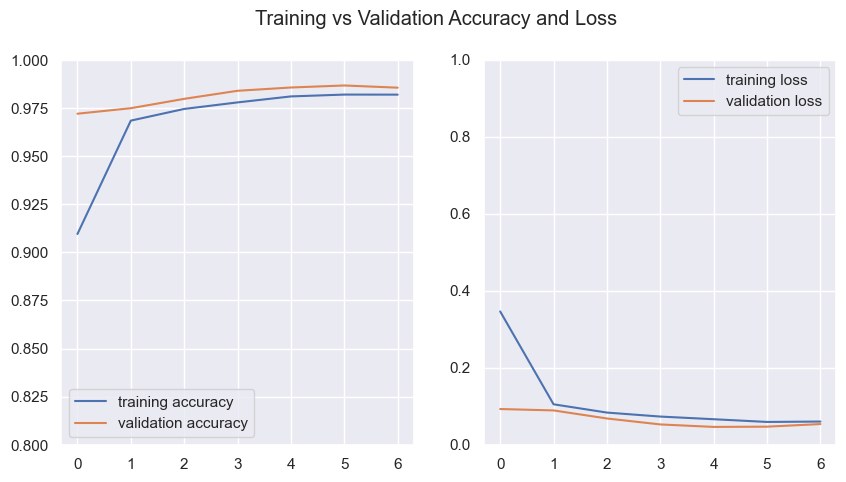

In [172]:
plot_training_and_validation_curves_cnn(history)

## **CNN Model Confusion Matrix**

In [173]:
y_pred = model.predict(X_train.values)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_true=y_train, y_pred=y_pred_classes)
column_names = [f"predicted: {i}" for i in range(10)]
row_names = [f"actual: {i}" for i in range(10)]
readable_conf_mat = pd.DataFrame(conf_mat, index=row_names, columns=column_names)
readable_conf_mat

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step


,predicted: 0,predicted: 1,predicted: 2,predicted: 3,predicted: 4,predicted: 5,predicted: 6,predicted: 7,predicted: 8,predicted: 9
actual: 0,4101,1,4,0,1,3,4,0,0,18
actual: 1,0,4638,20,0,1,0,0,23,1,1
actual: 2,2,1,4171,0,0,0,0,3,0,0
actual: 3,0,0,18,4324,0,1,1,4,1,2
actual: 4,0,6,3,0,4037,0,3,3,1,19
actual: 5,1,2,1,47,1,3725,12,1,3,2
actual: 6,3,8,6,0,2,4,4112,0,2,0
actual: 7,0,1,26,1,2,0,0,4363,1,7
actual: 8,8,12,16,18,3,5,4,0,3988,9
actual: 9,1,0,3,2,27,4,0,9,4,4138


<Axes: >

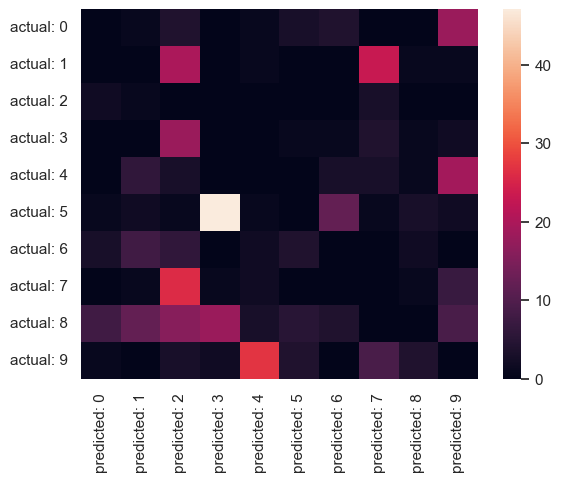

In [174]:
for i in range(10):
    readable_conf_mat.iloc[i, i] = 0
sns.heatmap(readable_conf_mat)

## **Final Evaluation of Model**

In [175]:
test_pred = model.predict(df_test)
test_pred_classes = np.argmax(test_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [176]:
test_pred_classes = np.asarray(test_pred_classes).squeeze()

# Build submission (ImageId 1..N)
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(test_pred_classes) + 1),
    "Label": test_pred_classes
})

# If the competition expects 1-based labels instead of 0-based, uncomment:
# submission["Label"] = submission["Label"] + 1

# Save
submission.to_csv("submission7.csv", index=False)

**Model Accuracy from Kaggle submission: 98.253%**